### Data loading and preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [3]:
#Load data
df = pd.read_json(r'C:\Code\ML_Project\Data\preprocessed_movieDB.json')
df=df[df['revenue']<100*1e+6]

In [4]:
scaler = MinMaxScaler()
df['budget'] = scaler.fit_transform(df['budget'].values.reshape(-1, 1))

In [5]:
# Creating binning
bin_size =20
df['revenue_bin'] = np.floor(df['revenue'] / (bin_size*1e+6 )).astype(int)

In [6]:
#Create feature and class target
X = df.drop(['title', 'revenue', 'revenue_bin'], axis=1)
y = df['revenue_bin']

In [7]:
# Standard scale
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [8]:
#Train, validation, test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Finetune with GridSearch

In [9]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [10]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid, verbose= 6) 
grid_search.fit(X_train, y_train) 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.634 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.634 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.633 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.633 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.633 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.634 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.634 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.633 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=sq

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=6)

In [11]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 150}

In [12]:
model_random = grid_search.best_estimator_
y_pred_rand = model_random.predict(X_test) 
print(confusion_matrix(y_test, y_pred_rand))

[[316  15   4   1   0]
 [ 58  19   6   2   0]
 [ 16   6   6  12   0]
 [  7   3   8  10   0]
 [  3   4   6  11   0]]


In [13]:
f1 = f1_score(y_test, y_pred_rand, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.6405430389030695


### Using with hyperparameter

In [14]:
model = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9, n_estimators=150)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

In [15]:
cx= confusion_matrix(y_test, y_pred)
cx

array([[320,  10,   5,   1,   0],
       [ 60,  17,   6,   2,   0],
       [ 16,   5,   8,  11,   0],
       [  7,   1,  10,  10,   0],
       [  3,   4,   8,   9,   0]], dtype=int64)

In [16]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.6452083070670988


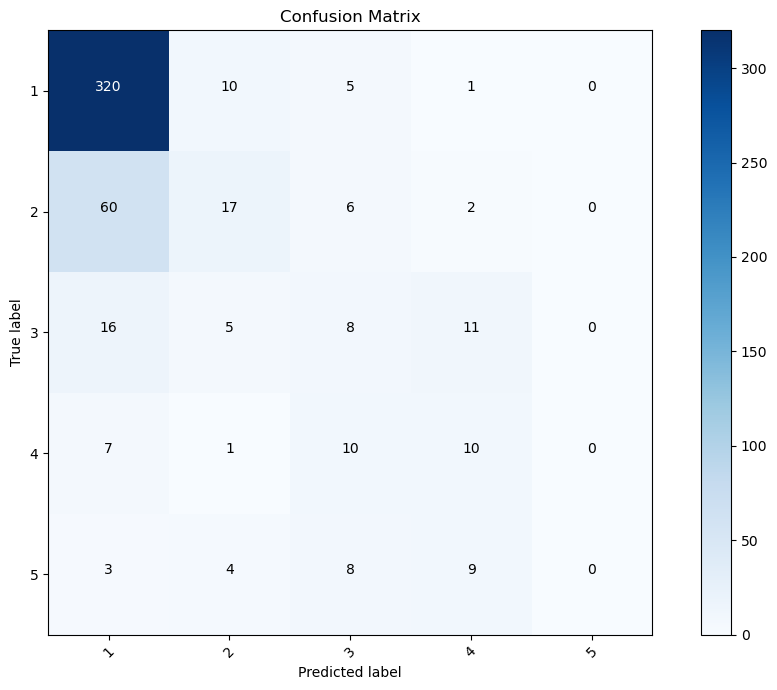

In [17]:
plt.figure(figsize=(10, 7))
plt.imshow(cx, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['1', '2', '3', '4', '5']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cx.max() / 2.
for i in range(cx.shape[0]):
    for j in range(cx.shape[1]):
        plt.text(j, i, format(cx[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cx[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [18]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       336
           1       0.46      0.20      0.28        85
           2       0.22      0.20      0.21        40
           3       0.30      0.36      0.33        28
           4       0.00      0.00      0.00        24

    accuracy                           0.69       513
   macro avg       0.35      0.34      0.34       513
weighted avg       0.63      0.69      0.65       513

